In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import evalml
plt.style.use('ggplot')

In [2]:
df1 = pd.read_pickle('base_treinamento_testes.pkl')
df1.head(3)

,codigo_vaga,ultimo_salario_candidato,ultimo_cargo_candidato,area_interesse_candidato,nivel_candidato,formacao_candidato,cidade_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga,nivel_vaga,formacao_vaga,cidade_vaga,aprovado_vaga
4146,-5433147389500583028,0.0,INDUSTRIAL TRAINEE,ENGENHARIA QUIMICA,JUNIOR/TRAINEE,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,SALVADOR,2.0,1.0,6.450,0.0,6.25,7.0,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
4147,-5433147389500583028,1500.0,DESENVOLVIMENTO ENGENHEIRO PRO,ADMINISTRACAO DE EMPRESAS,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,4.0,1.0,8.000,0.0,7.99,8.2,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
4148,-5433147389500583028,2050.0,CLIENTE ESTAGIO QUALIDADE,ENGENHARIA DE PRODUCAO,ESTAGIO,FORMACAO SUPERIOR COMPLETA,ARUJA,2.0,0.0,3.875,0.0,5.33,5.4,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0


In [3]:
df2 = pd.read_pickle('base_submission.pkl')
df2.head(3)

,codigo_vaga,ultimo_salario_candidato,ultimo_cargo_candidato,area_interesse_candidato,nivel_candidato,formacao_candidato,cidade_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga,nivel_vaga,formacao_vaga,cidade_vaga
0,-5432475023076753918,9100.0,GLOBAL TRAINEE,ENGENHARIA DE PRODUCAO,PLENO,FORMACAO SUPERIOR COMPLETA,SAO PAULO,4.0,0.0,7.00,0.00,7.335,7.0,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA
1,-5432475023076753918,7653.0,TRADE,COMPRAS,SENIOR,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,RIO DE JANEIRO,4.0,3.0,8.00,7.50,6.670,7.0,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA
2,-5432475023076753918,1978.0,CONTROLADOR PRODUCAO,ENGENHARIA MECANICA,TECNICO,FORMACAO SUPERIOR COMPLETA,CACAPAVA,3.0,0.0,4.75,6.75,7.340,7.4,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA


In [4]:
df = pd.concat([df1, df2])
df


,codigo_vaga,ultimo_salario_candidato,ultimo_cargo_candidato,area_interesse_candidato,nivel_candidato,formacao_candidato,cidade_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga,nivel_vaga,formacao_vaga,cidade_vaga,aprovado_vaga
4146,-5433147389500583028,0.0,INDUSTRIAL TRAINEE,ENGENHARIA QUIMICA,JUNIOR/TRAINEE,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,SALVADOR,2.0,1.0,6.450,0.000,6.25,7.00,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0.0
4147,-5433147389500583028,1500.0,DESENVOLVIMENTO ENGENHEIRO PRO,ADMINISTRACAO DE EMPRESAS,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,4.0,1.0,8.000,0.000,7.99,8.20,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0.0
4148,-5433147389500583028,2050.0,CLIENTE ESTAGIO QUALIDADE,ENGENHARIA DE PRODUCAO,ESTAGIO,FORMACAO SUPERIOR COMPLETA,ARUJA,2.0,0.0,3.875,0.000,5.33,5.40,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0.0
4149,-5433147389500583028,0.0,CONTA EXECUTIVO PARCERIA,MARKETING,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,3.0,0.0,7.250,0.000,7.99,6.25,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0.0
4150,-5433147389500583028,1890.0,CICLO PDCA,MARKETING,AUXILIAR/OPERACIONAL,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,SAO PAULO,3.0,4.0,5.250,6.375,6.65,7.00,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47101,-6387918047679571035,1170.0,ESTAGIO,ENGENHARIA MECANICA,ESTAGIO,POS-GRADUACAO NO NIVEL MESTRADO,BELO HORIZONTE,3.0,0.0,7.000,2.750,8.00,7.75,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,NaN
47102,-6387918047679571035,2300.0,ACADEMICO AUXILIAR FINANCEIRO,ATEND. A CLIENTE,AUXILIAR/OPERACIONAL,FORMACAO SUPERIOR (CURSANDO),SAO PAULO,2.0,1.0,4.375,4.000,5.99,4.00,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,NaN
47103,-6387918047679571035,7500.0,CONSULTANT,MATEMATICA/ESTATISTICA,SENIOR,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,SUZANO,2.0,0.0,4.250,0.000,4.65,8.00,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,NaN
47104,-6387918047679571035,3000.0,FARMACEUTICO,FARMACIA,SENIOR,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,SAO PAULO,2.0,1.0,3.000,0.000,5.50,3.90,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,NaN


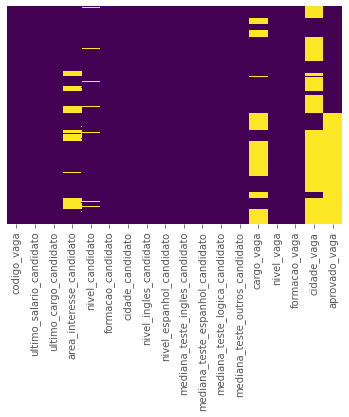

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

<b>Antes de começar a tratar os dados, algumas hipóteses a serem levantadas:</b>

Código de vaga é realmente uma variável importante? Se o código de cadastro é gerado aleatoriamente no sistema, qual a relação dessa variável com o candidato ser ou não aprovado? Acredito que nenhuma relação. É uma variável que pode ser excluída.

Área de interesse do candidato: Primeiramente que são muitas áreas. Transformar todas essas áreas em números, poderia distorcer o modelo. Segundo, como o próprio nome já diz, área de interesse e não necessáriamente o candidato tem alguma experiência nesse campo. Eu posso me interessar por Astronomia, mas não necessariamente tenho aptidão ou competência para essa área. É algo que está relacionado com o desejo do candidato, não necessariamente uma competência ou habilidade comprovada. Por esse motivo, é uma variável que pode ser excluída também.

Cidade do candidato e cidade vaga, ambas foram excluídas pois temos cidades de diferentes países. E isso pode afetar outras variáveis, como por exemplo, o salário. Por exemplo, temos cidades da Argentina, Colombia e Brasil, todos com moedas diferentes. Esse fator, impacta diretamente em uma das variáveis mais importantes que é o salário. 

Outras variáveis foram transformadas em dummies. 

In [6]:
df.sort_values('cidade_vaga', ascending=False, inplace=True) 
df

,codigo_vaga,ultimo_salario_candidato,ultimo_cargo_candidato,area_interesse_candidato,nivel_candidato,formacao_candidato,cidade_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga,nivel_vaga,formacao_vaga,cidade_vaga,aprovado_vaga
20562,-328337796252815598,1983.0,AUXILIAR FATURAMENTO,ADMINISTRACAO PUBLICA,AUXILIAR/OPERACIONAL,FORMACAO SUPERIOR COMPLETA,CARAPICUIBA,0.0,0.0,2.875,0.00,5.990,5.600,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),SAO PAULO,0.0
8808,3432259187290165962,3000.0,TRAINEE,MARKETING,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,3.0,1.0,6.750,0.00,4.000,7.500,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),SAO PAULO,0.0
8800,3432259187290165962,3400.0,ASSISTENTE TECNICO,ADMINISTRACAO PUBLICA,PLENO,POS-GRADUACAO NO NIVEL MESTRADO,SAO PAULO,4.0,1.0,9.320,0.00,7.330,2.725,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),SAO PAULO,0.0
8801,3432259187290165962,4000.0,ANALISTA METODO PROCESSO,COMPRAS,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,1.0,0.0,3.000,2.50,5.455,3.200,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),SAO PAULO,0.0
8802,3432259187290165962,4200.0,PROJETISTA PROJETO SUPERVISOR,ENGENHARIA MECANICA,PLENO,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,UBERLANDIA,4.0,1.0,6.500,0.00,5.325,6.700,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),SAO PAULO,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47101,-6387918047679571035,1170.0,ESTAGIO,ENGENHARIA MECANICA,ESTAGIO,POS-GRADUACAO NO NIVEL MESTRADO,BELO HORIZONTE,3.0,0.0,7.000,2.75,8.000,7.750,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,NaN
47102,-6387918047679571035,2300.0,ACADEMICO AUXILIAR FINANCEIRO,ATEND. A CLIENTE,AUXILIAR/OPERACIONAL,FORMACAO SUPERIOR (CURSANDO),SAO PAULO,2.0,1.0,4.375,4.00,5.990,4.000,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,NaN
47103,-6387918047679571035,7500.0,CONSULTANT,MATEMATICA/ESTATISTICA,SENIOR,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,SUZANO,2.0,0.0,4.250,0.00,4.650,8.000,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,NaN
47104,-6387918047679571035,3000.0,FARMACEUTICO,FARMACIA,SENIOR,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,SAO PAULO,2.0,1.0,3.000,0.00,5.500,3.900,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,NaN


In [7]:
duplicados = df[df.duplicated(keep='first')]
print(duplicados)


               codigo_vaga  ultimo_salario_candidato  \
39245  8670946023719118796                       0.0   
39275  8670946023719118796                       0.0   
39351  8670946023719118796                       0.0   
39472  8670946023719118796                       0.0   
39507  8670946023719118796                       0.0   
...                    ...                       ...   
36645 -3926712961740574529                       0.0   
36651 -3926712961740574529                       0.0   
36652 -3926712961740574529                       0.0   
36669 -3926712961740574529                       0.0   
36675 -3926712961740574529                       0.0   

          ultimo_cargo_candidato area_interesse_candidato  \
39245           NAO CLASSIFICADO                     None   
39275           NAO CLASSIFICADO                     None   
39351           NAO CLASSIFICADO                     None   
39472           NAO CLASSIFICADO                     None   
39507           NAO CL

In [8]:
df.drop_duplicates(keep='first', inplace=True) 

In [9]:
df.drop(df[df.cidade_vaga=='GUADALAJARA'].index, inplace=True)

In [10]:
df.drop(df[df.cidade_candidato=='BUENOS AIRES'].index, inplace=True)

In [11]:
df

,codigo_vaga,ultimo_salario_candidato,ultimo_cargo_candidato,area_interesse_candidato,nivel_candidato,formacao_candidato,cidade_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga,nivel_vaga,formacao_vaga,cidade_vaga,aprovado_vaga
20562,-328337796252815598,1983.0,AUXILIAR FATURAMENTO,ADMINISTRACAO PUBLICA,AUXILIAR/OPERACIONAL,FORMACAO SUPERIOR COMPLETA,CARAPICUIBA,0.0,0.0,2.875,0.00,5.990,5.600,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),SAO PAULO,0.0
8808,3432259187290165962,3000.0,TRAINEE,MARKETING,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,3.0,1.0,6.750,0.00,4.000,7.500,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),SAO PAULO,0.0
8800,3432259187290165962,3400.0,ASSISTENTE TECNICO,ADMINISTRACAO PUBLICA,PLENO,POS-GRADUACAO NO NIVEL MESTRADO,SAO PAULO,4.0,1.0,9.320,0.00,7.330,2.725,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),SAO PAULO,0.0
8801,3432259187290165962,4000.0,ANALISTA METODO PROCESSO,COMPRAS,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,1.0,0.0,3.000,2.50,5.455,3.200,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),SAO PAULO,0.0
8802,3432259187290165962,4200.0,PROJETISTA PROJETO SUPERVISOR,ENGENHARIA MECANICA,PLENO,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,UBERLANDIA,4.0,1.0,6.500,0.00,5.325,6.700,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),SAO PAULO,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47101,-6387918047679571035,1170.0,ESTAGIO,ENGENHARIA MECANICA,ESTAGIO,POS-GRADUACAO NO NIVEL MESTRADO,BELO HORIZONTE,3.0,0.0,7.000,2.75,8.000,7.750,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,NaN
47102,-6387918047679571035,2300.0,ACADEMICO AUXILIAR FINANCEIRO,ATEND. A CLIENTE,AUXILIAR/OPERACIONAL,FORMACAO SUPERIOR (CURSANDO),SAO PAULO,2.0,1.0,4.375,4.00,5.990,4.000,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,NaN
47103,-6387918047679571035,7500.0,CONSULTANT,MATEMATICA/ESTATISTICA,SENIOR,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,SUZANO,2.0,0.0,4.250,0.00,4.650,8.000,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,NaN
47104,-6387918047679571035,3000.0,FARMACEUTICO,FARMACIA,SENIOR,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,SAO PAULO,2.0,1.0,3.000,0.00,5.500,3.900,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,NaN


In [12]:
del df['codigo_vaga']
del df['area_interesse_candidato']
del df['cidade_vaga']
del df['cidade_candidato']


## Tratamento dos valores faltantes

Algumas variáveis possuem muitos dados faltantes. A varivável cidade_vaga será excluída do modelo, pois 0,06669 das vagas não possuem a cidade listada. Ou seja 2/3 desses dados não estão contidos. São muitos dados para "preencher", e isso poderá enviessar o nosso modelo. 


In [16]:
df.isnull().sum()

ultimo_salario_candidato                0
ultimo_cargo_candidato                  0
nivel_candidato                       978
formacao_candidato                      0
nivel_ingles_candidato                  0
nivel_espanhol_candidato                0
mediana_teste_ingles_candidato          0
mediana_teste_espanhol_candidato        0
mediana_teste_logica_candidato          0
mediana_teste_outros_candidato          0
cargo_vaga                          20732
formacao_vaga                           0
aprovado_vaga                       26134
dtype: int64

In [ ]:
#data['cidade_candidato'].replace(['None'], np.nan)

#data['cidade_candidato'].fillna('SAO PAULO', inplace=True)

In [ ]:
#Vamos dar um replace aonde está None, para São Paulo. 
#data['cidade_vaga'].unique()

#data = data.replace(['None'], np.nan)

#data['cidade_vaga'].fillna('SAO PAULO', inplace=True)

In [15]:
#Foi deletada essa coluna pois tinha apenas uma série de dados
del df['nivel_vaga']

In [17]:
df['nivel_candidato'].value_counts()

JUNIOR/TRAINEE            12934
ESTAGIO                   11375
PLENO                      9472
AUXILIAR/OPERACIONAL       5527
SUPERVISAO/COORDENACAO     4274
TECNICO                    1966
SENIOR                     1868
GERENCIA                   1600
DIRETORIA                   574
Name: nivel_candidato, dtype: int64

In [18]:
nivel_candidato = {'JUNIOR/TRAINEE' : 1, 
                   'ESTAGIO' : 0,
                   'PLENO': 3, 
                   'AUXILIAR/OPERACIONAL': 2,
                   'SUPERVISAO/COORDENACAO': 5,
                   'TECNICO': 4,
                   'SENIOR': 6,
                   'GERENCIA': 7,
                   'DIRETORIA': 8} 
df.replace({'nivel_candidato': nivel_candidato
                }, inplace=True)

In [19]:
df.nivel_candidato = df.nivel_candidato.astype('float64')

In [20]:
df['nivel_candidato'].mean()

2.1907239362774753

In [21]:
df['nivel_candidato'].median()

2.0

In [22]:
df['nivel_candidato'].fillna(df['nivel_candidato'].median(), inplace=True)

O motivo para que preenchessemos as variáveis faltantes (Nan) por estágio, por conta de que a mais de 80% das pessoas não concluíram a faculdade. Se levarmos em conta que a grande maioria não tem experiência, o estágio nesse caso é a melhor opção. 

In [23]:
df['aprovado_vaga'].value_counts()

0.0    22147
1.0     2287
Name: aprovado_vaga, dtype: int64

## Transformação das variáveis categóricas em variáveis numéricas ou dummies. 

In [24]:
df['cargo_vaga'].value_counts()

PROGRAMA TRAINEE             19623
CORPORATIVO TRAINEE           2414
COORDENADOR PROGRAMA          2404
GERENTE LOJA SUPERMERCADO     1834
INTERNACIONAL TRAINEE         1677
TELECOMUNICACAO TRAINEE        988
COMERCIAL                      734
TRAINEE                        162
Name: cargo_vaga, dtype: int64

In [25]:
cargo_vaga = {'PROGRAMA TRAINEE': 0,
              'INTERNACIONAL TRAINEE': 0,
              'TELECOMUNICACAO TRAINEE': 0,
              'TRAINEE': 0, 
                'GERENTE LOJA SUPERMERCADO' : 3, 
                'COMERCIAL': 1,
                'COORDENADOR PROGRAMA': 2,
                'CORPORATIVO TRAINEE': 0} 
df.replace({'cargo_vaga': cargo_vaga
                }, inplace=True)

In [26]:
df.cargo_vaga = df.cargo_vaga.astype('float64')

In [27]:
df['cargo_vaga'].mean()

0.37015685748759886

In [28]:
df['cargo_vaga'].median()

0.0

In [29]:
df['cargo_vaga'].fillna(df['cargo_vaga'].median(), inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50568 entries, 20562 to 47105
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ultimo_salario_candidato          50568 non-null  float64
 1   ultimo_cargo_candidato            50568 non-null  object 
 2   nivel_candidato                   50568 non-null  float64
 3   formacao_candidato                50568 non-null  object 
 4   nivel_ingles_candidato            50568 non-null  float64
 5   nivel_espanhol_candidato          50568 non-null  float64
 6   mediana_teste_ingles_candidato    50568 non-null  float64
 7   mediana_teste_espanhol_candidato  50568 non-null  float64
 8   mediana_teste_logica_candidato    50568 non-null  float64
 9   mediana_teste_outros_candidato    50568 non-null  float64
 10  cargo_vaga                        50568 non-null  float64
 11  formacao_vaga                     50568 non-null  object 
 12  

In [33]:
df.ultimo_cargo_candidato = df.ultimo_cargo_candidato.astype('category')
df.formacao_vaga = df.formacao_vaga.astype('category')
df.formacao_candidato = df.formacao_candidato.astype('category')


Aplicamos essa técnica para diminuir o tamanho do arquivo. Dessa forma conseguimos economizar memória e garantir mais performance na hora de treinar o algoritmo. Em grandes quantidades de dados essa é uma técnica que pode ser utilizada. 

Primeiramente vamos transformar todas as variáveis categóricas em valores númericos (incluindo os valores faltantes). Depois iremos preencher com valores numéricos esses dados faltantes que foram transformados. 

Continuamos a transformar variáveis categóricas em numéricas

In [34]:
df['formacao_candidato'].value_counts()

FORMACAO SUPERIOR COMPLETA                             34465
POS-GRADUACAO NO NIVEL ESPECIALIZACAO                   8461
FORMACAO SUPERIOR (CURSANDO)                            4616
POS-GRADUACAO NO NIVEL MESTRADO                         2871
POS-GRADUACAO NO NIVEL DOUTORADO                         111
ENSINO MEDIO (2O. GRAU) COMPLETO                          18
ENSINO MEDIO (2O. GRAU) PROFISSIONALIZANTE COMPLETO       12
FORMACAO SUPERIOR INTERROMPIDA                             9
ENSINO FUNDAMENTAL (1O. GRAU) INTERROMPIDO                 5
Name: formacao_candidato, dtype: int64

In [35]:
formacao_candidato = {'ENSINO FUNDAMENTAL (1O. GRAU) INTERROMPIDO': 0,
              'ENSINO MEDIO (2O. GRAU) COMPLETO': 1,
              'ENSINO MEDIO (2O. GRAU) PROFISSIONALIZANTE COMPLETO': 2,
              'FORMACAO SUPERIOR INTERROMPIDA': 3, 
                'FORMACAO SUPERIOR (CURSANDO)' : 4, 
                'FORMACAO SUPERIOR COMPLETA': 5,
                'POS-GRADUACAO NO NIVEL ESPECIALIZACAO': 6,
                'POS-GRADUACAO NO NIVEL MESTRADO': 7,
                'POS-GRADUACAO NO NIVEL DOUTORADO': 8} 
df.replace({'formacao_candidato': formacao_candidato
                }, inplace=True)

In [36]:
df['formacao_vaga'].value_counts()

FORMACAO SUPERIOR (CURSANDO)    47032
FORMACAO SUPERIOR COMPLETA       3536
Name: formacao_vaga, dtype: int64

In [37]:
del df['formacao_vaga']

In [ ]:
#formacao_vaga = {'FORMACAO SUPERIOR (CURSANDO)': 0,
                  'FORMACAO SUPERIOR COMPLETA': 1} 
#data.replace({'formacao_vaga': formacao_vaga
                }, inplace=True)

In [ ]:
#df = pd.get_dummies(df, columns=['cidade_vaga'],drop_first=False)
#df

In [60]:
## SEPARANDO OS NOSSOS DADOS NOVAMENTE EM TREINO E TESTE

df['aprovado_vaga'].replace(['None'], np.nan)

df['aprovado_vaga'].fillna('nao', inplace=True)

In [53]:
data = df[(df['aprovado_vaga']==0.0) | (df['aprovado_vaga']==1.0)]
data

,ultimo_salario_candidato,ultimo_cargo_candidato,nivel_candidato,formacao_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga,aprovado_vaga
20562,1983.0,AUXILIAR FATURAMENTO,2.0,5,0.0,0.0,2.875,0.0,5.990,5.600,0.0,0.0
8808,3000.0,TRAINEE,1.0,5,3.0,1.0,6.750,0.0,4.000,7.500,0.0,0.0
8800,3400.0,ASSISTENTE TECNICO,3.0,7,4.0,1.0,9.320,0.0,7.330,2.725,0.0,0.0
8801,4000.0,ANALISTA METODO PROCESSO,1.0,5,1.0,0.0,3.000,2.5,5.455,3.200,0.0,0.0
8802,4200.0,PROJETISTA PROJETO SUPERVISOR,3.0,6,4.0,1.0,6.500,0.0,5.325,6.700,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
52270,0.0,ADMINISTRATIVO COMMUNITY MANAG,3.0,4,0.0,0.0,0.000,0.0,0.000,6.700,0.0,0.0
52272,0.0,INSTRUTOR,3.0,5,0.0,0.0,0.000,0.0,0.000,6.000,0.0,0.0
52274,0.0,NAO CLASSIFICADO,2.0,6,0.0,0.0,0.000,0.0,0.000,6.600,0.0,0.0
52275,1300.0,ESTAGIO MANUTENCAO,0.0,5,4.0,0.0,9.750,0.0,7.675,8.200,0.0,0.0


In [197]:
treino = df[(df['aprovado_vaga']=='nao')]
treino


,ultimo_salario_candidato,ultimo_cargo_candidato,nivel_candidato,formacao_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga,aprovado_vaga
1128,890.0,ANALYST OPERATIOM PROCUREMENT,1.0,5,2.0,1.0,0.000,0.000,0.00,6.50,0.0,nao
1125,0.0,PRODUCAO SUPERVISOR,5.0,6,4.0,0.0,8.320,0.000,7.32,8.40,0.0,nao
1126,0.0,FISICO PROFESSOR ROBOTICO,1.0,5,3.0,1.0,6.750,3.750,5.32,8.00,0.0,nao
1127,3000.0,ANALISTA PROJETO,2.0,5,3.0,0.0,5.000,0.000,6.50,6.50,0.0,nao
1140,4000.0,COMPRADOR,6.0,5,2.0,2.0,5.250,5.625,7.00,6.00,0.0,nao
...,...,...,...,...,...,...,...,...,...,...,...,...
47101,1170.0,ESTAGIO,0.0,7,3.0,0.0,7.000,2.750,8.00,7.75,0.0,nao
47102,2300.0,ACADEMICO AUXILIAR FINANCEIRO,2.0,4,2.0,1.0,4.375,4.000,5.99,4.00,0.0,nao
47103,7500.0,CONSULTANT,6.0,6,2.0,0.0,4.250,0.000,4.65,8.00,0.0,nao
47104,3000.0,FARMACEUTICO,6.0,6,2.0,1.0,3.000,0.000,5.50,3.90,0.0,nao


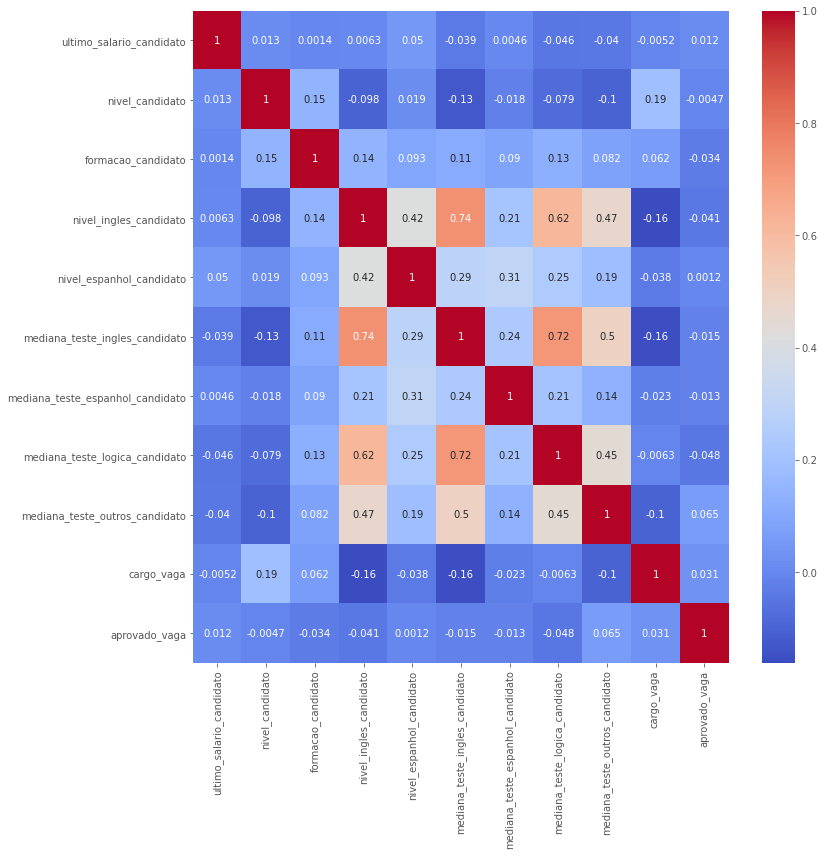

In [63]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
plt.rcParams['figure.figsize'] = (12.0, 12.0)

Interessante notar que quem disse ter um bom nível de inglês, parece que realmente tem um bom nível de inglês tem uma facilidade para lógica. Já os candidatos que dizem saber espanhol, parece que nem todos tem um bom domínio de do idioma espanhol e tiveram resultados piores em lógica comparando com o inglês. 

Já a variável alvo que é a aprovado vaga, parece que não tem nenhuma correlação forte com nenhuma das variáveis que serão testadas. O que é bom, pois diminuí a chance de multicolinealidade nos dados. 

Outro ponto interessante, que apesar da correlação dos dados serem baixas, nivel de inglês, mediana do teste de lógica e a mediana de teste outros candidatos tem uma maior correlação (tanto positiva quanto negativa) em ser aprovado. 




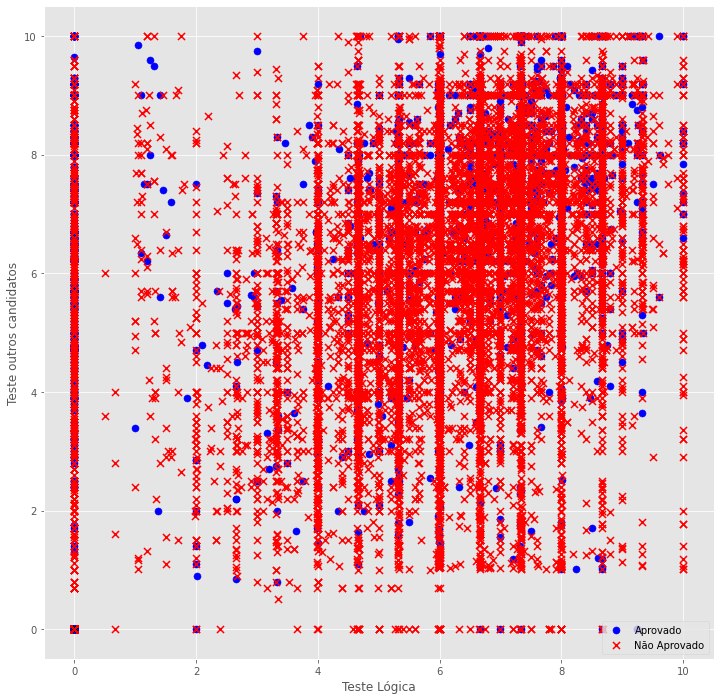

In [64]:
positive = data[data['aprovado_vaga'].isin([1])]  
negative = data[data['aprovado_vaga'].isin([0])]

fig, ax = plt.subplots(figsize=(12,12)) 
ax.scatter(positive['mediana_teste_logica_candidato'], positive['mediana_teste_outros_candidato'], s=50, c='b', marker='o', label='Aprovado')  
ax.scatter(negative['mediana_teste_logica_candidato'], negative['mediana_teste_outros_candidato'], s=50, c='r', marker='x', label='Não Aprovado')  
ax.legend()  
ax.set_xlabel('Teste Lógica')  
ax.set_ylabel('Teste outros candidatos');

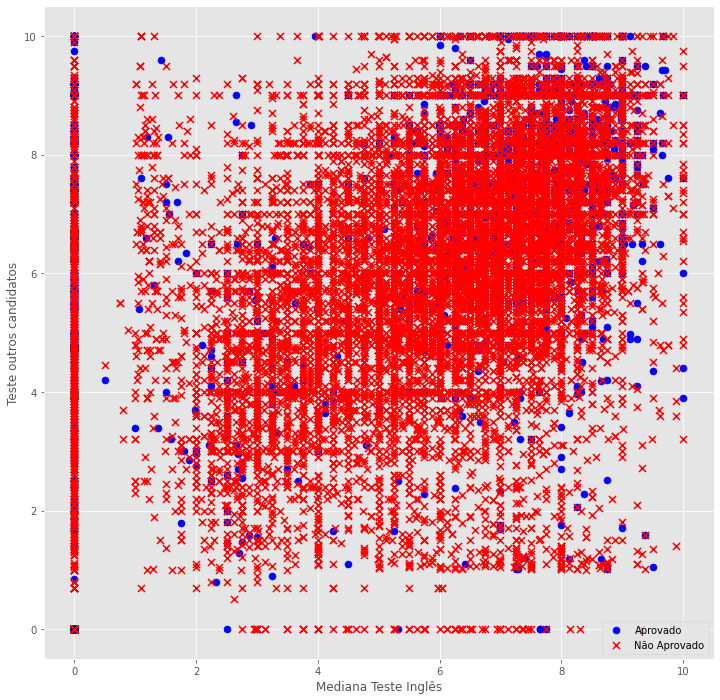

In [65]:
positive = data[data['aprovado_vaga'].isin([1])]  
negative = data[data['aprovado_vaga'].isin([0])]

fig, ax = plt.subplots(figsize=(12,12)) 
ax.scatter(positive['mediana_teste_ingles_candidato'], positive['mediana_teste_outros_candidato'], s=50, c='b', marker='o', label='Aprovado')  
ax.scatter(negative['mediana_teste_ingles_candidato'], negative['mediana_teste_outros_candidato'], s=50, c='r', marker='x', label='Não Aprovado')  
ax.legend()  
ax.set_xlabel('Mediana Teste Inglês')  
ax.set_ylabel('Teste outros candidatos');

Text(0, 0.5, 'Mediana Teste Lógica')

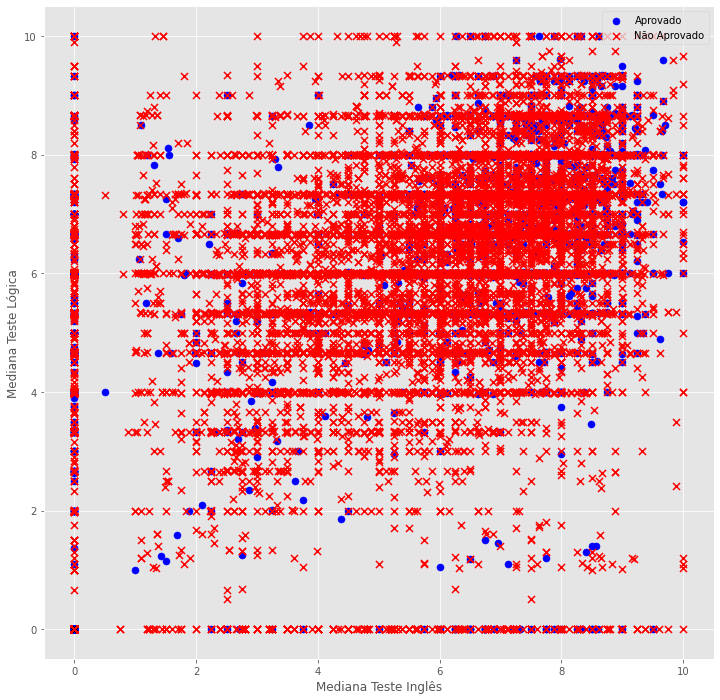

In [66]:
positive = data[data['aprovado_vaga'].isin([1])]  
negative = data[data['aprovado_vaga'].isin([0])]

fig, ax = plt.subplots(figsize=(12,12)) 
ax.scatter(positive['mediana_teste_ingles_candidato'], positive['mediana_teste_logica_candidato'], s=50, c='b', marker='o', label='Aprovado')  
ax.scatter(negative['mediana_teste_ingles_candidato'], negative['mediana_teste_logica_candidato'], s=50, c='r', marker='x', label='Não Aprovado')  
ax.legend()  
ax.set_xlabel('Mediana Teste Inglês')  
ax.set_ylabel('Mediana Teste Lógica')

Esses gráficos nos ajudam a enteder que:
    * Apesar de não termos uma regra geral, quanto maiores as notas nos testes, maiores as chances de serem aprovados. 
    * Há muitas notas altas nos dois eixos em ambos os testes que mesmo assim não foram escolhidos. Nesse caso, o currículo com a formação, ultimo emprego, ultimo salários podem estar influenciando também. 

## APLICANDO O NORMALIZER E O STANDARDSCALER

In [68]:
del data['ultimo_cargo_candidato']
data.head()

,ultimo_salario_candidato,nivel_candidato,formacao_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga,aprovado_vaga
20562,1983.0,2.0,5,0.0,0.0,2.875,0.0,5.990,5.600,0.0,0.0
8808,3000.0,1.0,5,3.0,1.0,6.750,0.0,4.000,7.500,0.0,0.0
8800,3400.0,3.0,7,4.0,1.0,9.320,0.0,7.330,2.725,0.0,0.0
8801,4000.0,1.0,5,1.0,0.0,3.000,2.5,5.455,3.200,0.0,0.0
8802,4200.0,3.0,6,4.0,1.0,6.500,0.0,5.325,6.700,0.0,0.0


In [71]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

# Normalizer - 
norm= Normalizer()

data[['ultimo_salario_candidato', 'nivel_candidato', 'formacao_candidato', 'nivel_ingles_candidato', 'nivel_espanhol_candidato', 'mediana_teste_ingles_candidato', 'mediana_teste_espanhol_candidato', 'mediana_teste_logica_candidato', 'mediana_teste_outros_candidato', 'cargo_vaga']]= norm.fit_transform(data[['ultimo_salario_candidato', 'nivel_candidato', 'formacao_candidato', 'nivel_ingles_candidato', 'nivel_espanhol_candidato', 'mediana_teste_ingles_candidato', 'mediana_teste_espanhol_candidato', 'mediana_teste_logica_candidato', 'mediana_teste_outros_candidato', 'cargo_vaga']])

scaler = StandardScaler()
data[['ultimo_salario_candidato', 'nivel_candidato', 'formacao_candidato', 'nivel_ingles_candidato', 'nivel_espanhol_candidato', 'mediana_teste_ingles_candidato', 'mediana_teste_espanhol_candidato', 'mediana_teste_logica_candidato', 'mediana_teste_outros_candidato', 'cargo_vaga']]= scaler.fit_transform(data[['ultimo_salario_candidato', 'nivel_candidato', 'formacao_candidato', 'nivel_ingles_candidato', 'nivel_espanhol_candidato', 'mediana_teste_ingles_candidato', 'mediana_teste_espanhol_candidato', 'mediana_teste_logica_candidato', 'mediana_teste_outros_candidato', 'cargo_vaga']])


## TESTANDO O EVALML

In [ ]:
del data['ultimo_cargo_candidato']
del data['cidade_candidato']

In [72]:
### Independent And Dependent Features
X=data.drop('aprovado_vaga',axis=1)
y=data['aprovado_vaga']

In [73]:
X.head()

,ultimo_salario_candidato,nivel_candidato,formacao_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga
20562,0.706283,-0.613524,-0.675902,-0.714495,-0.669559,-0.679300,-0.569908,-0.655806,-0.674119,-0.571804
8808,0.707600,-0.633856,-0.685975,-0.682542,-0.639393,-0.665927,-0.570999,-0.686879,-0.679105,-0.572923
8800,0.710179,-0.620538,-0.684306,-0.679271,-0.645696,-0.659470,-0.573473,-0.674894,-0.701256,-0.575809
8801,0.698811,-0.628211,-0.682146,-0.698375,-0.661459,-0.684502,-0.496279,-0.677489,-0.690420,-0.561856
8802,0.704526,-0.620230,-0.685585,-0.680966,-0.645136,-0.675691,-0.567870,-0.684932,-0.686658,-0.569092


In [74]:
y.value_counts(normalize=True)

0.0    0.906401
1.0    0.093599
Name: aprovado_vaga, dtype: float64

In [75]:
#### TRain And test data split
X_train,X_test,y_train,y_test=evalml.preprocessing.split_data(X,y,problem_type='binary')

In [76]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

In [77]:
X_train.head()

,ultimo_salario_candidato,nivel_candidato,formacao_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga
41785,-1.390128,0.832494,1.170538,2.444096,1.893407,0.475704,0.505793,0.476000,1.998443,0.634238
6555,0.732403,-0.666224,-0.670116,-0.664179,-0.697381,-0.639942,-0.596545,-0.616776,-0.681527,-0.604355
40012,-1.290698,1.520857,1.087658,1.780836,1.728025,2.570848,0.516597,0.944707,0.669962,0.642101
41498,0.736858,-0.670289,-0.678211,-0.619959,-0.702038,-0.654099,-0.600951,-0.606441,-0.692250,-0.609625
30489,-1.443774,0.383200,0.972724,1.886434,0.471600,2.019378,0.471295,2.133952,1.630962,0.591782


In [78]:
from evalml import AutoMLSearch

In [79]:
automl=AutoMLSearch(X_train=X_train,y_train=y_train,problem_type='binary',max_batches=1,optimize_thresholds=True)

In [80]:
automl.search()

In [81]:
automl.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,3,XGBoost Classifier w/ Label Encoder + Imputer ...,3,0.320043,0.005719,0.325933,90.102379,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,4,LightGBM Classifier w/ Label Encoder + Imputer...,4,0.321197,0.006542,0.328614,90.066706,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,6,Random Forest Classifier w/ Label Encoder + Im...,6,0.329113,0.002582,0.332090,89.821890,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,8,Extra Trees Classifier w/ Label Encoder + Impu...,8,0.339983,0.000641,0.340616,89.485717,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,1,Elastic Net Classifier w/ Label Encoder + Impu...,1,0.342294,0.000592,0.342965,89.414262,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,2,Logistic Regression Classifier w/ Label Encode...,2,0.342302,0.000598,0.342981,89.414018,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,7,Decision Tree Classifier w/ Label Encoder + Im...,7,0.412460,0.003331,0.412765,87.244317,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,5,CatBoost Classifier w/ Label Encoder + Imputer...,5,0.573636,0.000383,0.573874,82.259803,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Binary Classification Pipeline,0,3.233538,0.000287,3.233372,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [82]:
automl.best_pipeline


pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'Oversampler': ['Oversampler', 'Imputer.x', 'Label Encoder.y'], 'XGBoost Classifier': ['XGBoost Classifier', 'Oversampler.x', 'Oversampler.y']}, parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Oversampler':{'sampling_ratio': 0.25, 'k_neighbors_default': 5, 'n_jobs': -1, 'sampling_ratio_dict': None, 'k_neighbors': 5}, 'XGBoost Classifier':{'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'n_jobs': -1, 'eval_metric': 'logloss'}}, random_seed=0)

In [83]:
best_pipeline = automl.best_pipeline

In [84]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


***************************************************************
* XGBoost Classifier w/ Label Encoder + Imputer + Oversampler *
***************************************************************

Problem Type: binary
Model Family: XGBoost

Pipeline Steps
1. Label Encoder
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. Oversampler
	 * sampling_ratio : 0.25
	 * k_neighbors_default : 5
	 * n_jobs : -1
	 * sampling_ratio_dict : None
	 * k_neighbors : 5
4. XGBoost Classifier
	 * eta : 0.1
	 * max_depth : 6
	 * min_child_weight : 1
	 * n_estimators : 100
	 * n_jobs : -1
	 * eval_metric : logloss

Training
Training for binary problems.
Total training time (including CV): 8.2 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.326    

In [85]:
best_pipeline.score(X_test, y_test, objectives=["auc","f1","Precision","Recall"])

OrderedDict([('AUC', 0.6890341366552895),
             ('F1', 0.25382262996941896),
             ('Precision', 0.1654485049833887),
             ('Recall', 0.5448577680525164)])

In [86]:
automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1', 'precision'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

In [87]:
automl_auc.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,3,XGBoost Classifier w/ Label Encoder + Imputer ...,3,0.697550,0.010938,0.685743,19.755009,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,4,LightGBM Classifier w/ Label Encoder + Imputer...,4,0.692588,0.010787,0.680264,19.258813,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,6,Random Forest Classifier w/ Label Encoder + Im...,6,0.687889,0.013031,0.673739,18.788920,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,8,Extra Trees Classifier w/ Label Encoder + Impu...,8,0.646061,0.011044,0.639941,14.606069,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,5,CatBoost Classifier w/ Label Encoder + Imputer...,5,0.633274,0.013432,0.617764,13.327362,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,7,Decision Tree Classifier w/ Label Encoder + Im...,7,0.631869,0.011012,0.636216,13.186922,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,1,Elastic Net Classifier w/ Label Encoder + Impu...,1,0.615351,0.001167,0.614020,11.535071,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,2,Logistic Regression Classifier w/ Label Encode...,2,0.615109,0.001216,0.613718,11.510907,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Binary Classification Pipeline,0,0.500000,0.000000,0.500000,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [88]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]["id"])


***************************************************************
* XGBoost Classifier w/ Label Encoder + Imputer + Oversampler *
***************************************************************

Problem Type: binary
Model Family: XGBoost

Pipeline Steps
1. Label Encoder
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. Oversampler
	 * sampling_ratio : 0.25
	 * k_neighbors_default : 5
	 * n_jobs : -1
	 * sampling_ratio_dict : None
	 * k_neighbors : 5
4. XGBoost Classifier
	 * eta : 0.1
	 * max_depth : 6
	 * min_child_weight : 1
	 * n_estimators : 100
	 * n_jobs : -1
	 * eval_metric : logloss

Training
Training for binary problems.
Total training time (including CV): 8.1 seconds

Cross Validation
----------------
              AUC    F1  Precision # Training # Validation
0           0.686 0.254      0.172     13,031        6,516
1           0.700 0.270      0.198     13,031      

## HIPOTESES MELHORIA MODELO

- Nosso modelo, teve um desempenho muito abaixo do esperado. 

- Nossos dados estão muito desbalanceados. Teremos que aplicar duas técnicas para esse tipo de situação. Uma será gerar dados sintéticos; o principal efeito colateral é overfitting no modelo. 

- Outra solução, seria igualar a mesma quantidade da classe 1 (aprovados [0.095464] e igualar a classe 0 para cerca de 0.095464 dos dados; principal efeito colateral é a brusca redução das quantidade de variáveis para o modelo treinar. 

- Outra coisa que pode ajudar o modelo, é fazer uma normalização desses dados. 



## Criando os Modelos


In [114]:
from sklearn.model_selection import train_test_split

In [115]:
y = data['aprovado_vaga']
X = data.drop('aprovado_vaga',axis=1)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size=0.20)

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgbm
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix

In [118]:
pd.options.mode.chained_assignment = None
# criando dataset auxiliar
data_aux = data.tail(1000)

# eliminando valores de df_teste do dataset original
data_model = data.drop(index = data_aux.index)

# arrumando index de df_teste
data_aux.reset_index(inplace = True)
data_aux.drop('index', axis = 1, inplace = True)

In [119]:
# obtendo o novo tamanho do dataframe
print('DataFrame principal:\n')
print('Número de quantidade de dados:\t {}'.format(data_model.shape[0]))
print('Número de variáveis/atributos:\t {}\n'.format(data_model.shape[1]))

# obtendo o tamanho do dataframe auxiliar
print('DataFrame de teste:\n')
print('Número de quantidade de dados:\t {}'.format(data_aux.shape[0]))
print('Número de variáveis/atributos:\t {}'.format(data_aux.shape[1]))

DataFrame principal:

Número de quantidade de dados:	 23434
Número de variáveis/atributos:	 11

DataFrame de teste:

Número de quantidade de dados:	 1000
Número de variáveis/atributos:	 11


In [120]:
SEED = 42
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print('O dataset de treino possui {} registros e o de treino {} registros.'
       .format(X_train.shape[0], X_test.shape[0]))

O dataset de treino possui 19547 registros e o de treino 4887 registros.


In [121]:
%%time

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

np.random.seed(SEED)
dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train,y_train)
predict = dtree.predict(X_test)
accuracy = accuracy_score(y_test, predict) * 100
print('\n')
print ("A acurácia foi de {:.2f}%.".format(accuracy))




A acurácia foi de 90.57%.
CPU times: user 102 ms, sys: 3.89 ms, total: 106 ms
Wall time: 105 ms


In [122]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
predict = model.predict(X_test)

accuracy = accuracy_score(y_test, predict) * 100
print ("A acurácia foi de {:.2f}%.".format(accuracy))

A acurácia foi de 90.57%.


In [123]:
X_news = data_aux.drop('aprovado_vaga', axis = 1)
y_news = data_aux['aprovado_vaga']

predict = model.predict(X_news)

accuracy = accuracy_score(y_news, predict) * 100
print ("A acurácia foi de {:.2f}%.".format(accuracy))

A acurácia foi de 82.70%.


In [124]:
## FIRST STEP

# divisao entre treino e teste do dataframe original
from sklearn.model_selection import train_test_split

SEED = 23
np.random.seed(SEED)

X = data.drop('aprovado_vaga', axis = 1)
y = data['aprovado_vaga']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y)

print('O dataset de treino possui {} registros e o de treino {} registros.'.format(X_train.shape[0], X_test.shape[0]))

O dataset de treino possui 19547 registros e o de treino 4887 registros.


In [125]:
#SECOND STEP

from sklearn.model_selection import cross_val_score

SEED = 42
np.random.seed(SEED)

model = DecisionTreeClassifier(max_depth=3)
results = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')


def intervalo(results):
  mean = results.mean()
  dv = results.std()
  print('Acurácia média: {:.2f}%'.format(mean*100))
  print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'.format((mean - 2*dv)*100, (mean + 2*dv)*100))

intervalo(results)

Acurácia média: 90.65%
Intervalo de acurácia: [90.60% ~ 90.71%]


In [126]:
from sklearn.model_selection import KFold

np.random.seed(SEED)

cv = KFold(n_splits = 5, shuffle = True)

model = DecisionTreeClassifier(max_depth=3)
results = cross_val_score(model, X_train, y_train, cv = cv)
intervalo(results)

Acurácia média: 90.66%
Intervalo de acurácia: [90.18% ~ 91.14%]


In [127]:
from sklearn.model_selection import StratifiedKFold

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model = DecisionTreeClassifier(max_depth=3)
results = cross_val_score(model, X_train, y_train, cv = cv)
intervalo(results)

Acurácia média: 90.64%
Intervalo de acurácia: [90.56% ~ 90.72%]


In [128]:
max_depth = [3, 2, 4, 5, 6, 7]

for item in max_depth:
  np.random.seed(SEED)
  cv = StratifiedKFold(n_splits = 5, shuffle = True)
  model = DecisionTreeClassifier(max_depth=item)
  results = cross_val_score(model, X_train, y_train, cv = cv, scoring = 'accuracy')
  mean = results.mean()
  dv = results.std()
  print('Acurácia média - Max Depth {}: {:.2f}%'.format(item, mean*100))
  print('Intervalo de acurácia - Max Depth {}: [{:.2f}% ~ {:.2f}%]\n'.format(item, (mean - 2*dv)*100, (mean + 2*dv)*100))

Acurácia média - Max Depth 3: 90.64%
Intervalo de acurácia - Max Depth 3: [90.56% ~ 90.72%]

Acurácia média - Max Depth 2: 90.64%
Intervalo de acurácia - Max Depth 2: [90.58% ~ 90.70%]

Acurácia média - Max Depth 4: 90.55%
Intervalo de acurácia - Max Depth 4: [90.41% ~ 90.70%]

Acurácia média - Max Depth 5: 90.53%
Intervalo de acurácia - Max Depth 5: [90.33% ~ 90.72%]

Acurácia média - Max Depth 6: 90.44%
Intervalo de acurácia - Max Depth 6: [90.21% ~ 90.67%]

Acurácia média - Max Depth 7: 90.38%
Intervalo de acurácia - Max Depth 7: [89.97% ~ 90.78%]



In [129]:
%%time
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model = DecisionTreeClassifier(max_depth=3)
model_svc = SVC()
model_log = LogisticRegression(solver='liblinear')
model_rand = RandomForestClassifier(n_estimators=100)
model_gbc = GradientBoostingClassifier(n_estimators=100, max_depth=5)
model_light = lgbm.LGBMClassifier()


models = [model, model_svc, model_log, model_rand, model_gbc, model_light]
name = ['Árvore de Decisão', 'SVC', 'Regressão Logística', 'Random Forest', 'GradientBoosting', 'Lightgbm']

count = 0
for item in models:
  np.random.seed(SEED)
  results = cross_val_score(item, X_train, y_train, cv = cv, scoring = 'accuracy')
  mean = results.mean()
  dv = results.std()
  print('Acurácia média - Modelo {}: {:.2f}%'.format(name[count], mean*100))
  print('Intervalo de acurácia - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'.format(name[count], (mean - 2*dv)*100, (mean + 2*dv)*100))
  count += 1  


Acurácia média - Modelo Árvore de Decisão: 90.64%
Intervalo de acurácia - Modelo Árvore de Decisão: [90.56% ~ 90.72%]

Acurácia média - Modelo SVC: 90.64%
Intervalo de acurácia - Modelo SVC: [90.64% ~ 90.64%]

Acurácia média - Modelo Regressão Logística: 90.64%
Intervalo de acurácia - Modelo Regressão Logística: [90.64% ~ 90.64%]

Acurácia média - Modelo Random Forest: 89.43%
Intervalo de acurácia - Modelo Random Forest: [89.09% ~ 89.77%]

Acurácia média - Modelo GradientBoosting: 90.42%
Intervalo de acurácia - Modelo GradientBoosting: [90.32% ~ 90.53%]

Acurácia média - Modelo Lightgbm: 90.51%
Intervalo de acurácia - Modelo Lightgbm: [90.36% ~ 90.66%]

CPU times: user 2min 54s, sys: 2.08 s, total: 2min 56s
Wall time: 2min 50s


### PRECISÃO

In [130]:
%%time
def intervalo_prec(results):
  mean = results.mean()
  dv = results.std()
  print('Precisão média: {:.2f}%'.format(mean*100))
  print('Intervalo de Precisão: [{:.2f}% ~ {:.2f}%]'.format((mean - 2*dv)*100, (mean + 2*dv)*100))

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_gbc
results = cross_val_score(model_gbc, X_train, y_train, cv = cv, scoring = 'precision')
intervalo_prec(results)

Precisão média: 25.26%
Intervalo de Precisão: [19.76% ~ 30.75%]
CPU times: user 1min 22s, sys: 42.3 ms, total: 1min 22s
Wall time: 1min 22s


### RECALL

In [131]:
%%time
def intervalo_recall(results):
  mean = results.mean()
  dv = results.std()
  print('Recall médio: {:.2f}%'.format(mean*100))
  print('Intervalo de Recall: [{:.2f}% ~ {:.2f}%]'.format((mean - 2*dv)*100, (mean + 2*dv)*100))

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_gbc
results = cross_val_score(model_gbc, X_train, y_train, cv = cv, scoring = 'recall')
intervalo_recall(results)

Recall médio: 1.20%
Intervalo de Recall: [0.38% ~ 2.02%]
CPU times: user 1min 25s, sys: 118 ms, total: 1min 25s
Wall time: 1min 25s


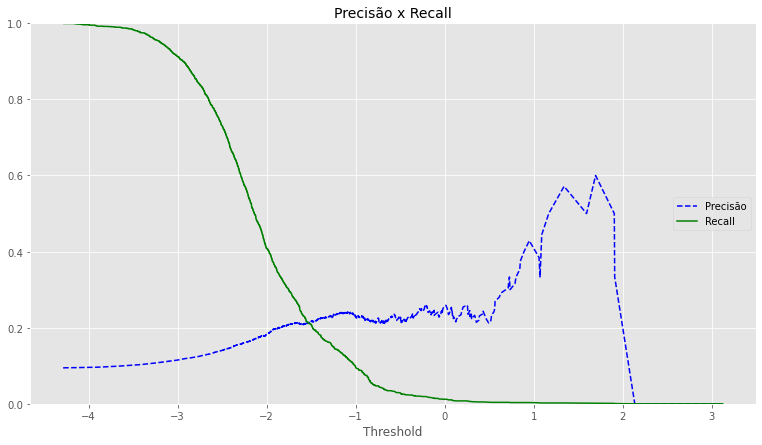

In [132]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_light
y_scores = cross_val_predict(model_gbc, X_train, y_train, cv = cv, method = 'decision_function')

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

fig, ax = plt.subplots(figsize = (13,7))

plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precisão')
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
plt.xlabel('Threshold')
plt.legend(loc = 'center right')
plt.ylim([0,1])
plt.title('Precisão x Recall', fontsize = 14)

plt.show()


In [134]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_train_pred_recall_90 = (y_scores > -1.50)

print('Nova precisão: {:.4f}'.format(precision_score(y_train,y_train_pred_recall_90)))
print('Novo recall: {:.4f}'.format(recall_score(y_train,y_train_pred_recall_90)))
print('Novo F1 Score: {:.4f}'.format(f1_score(y_train,y_train_pred_recall_90)))

Nova precisão: 0.2166
Novo recall: 0.2077
Novo F1 Score: 0.2121


CPU times: user 1min 23s, sys: 203 ms, total: 1min 23s
Wall time: 1min 23s


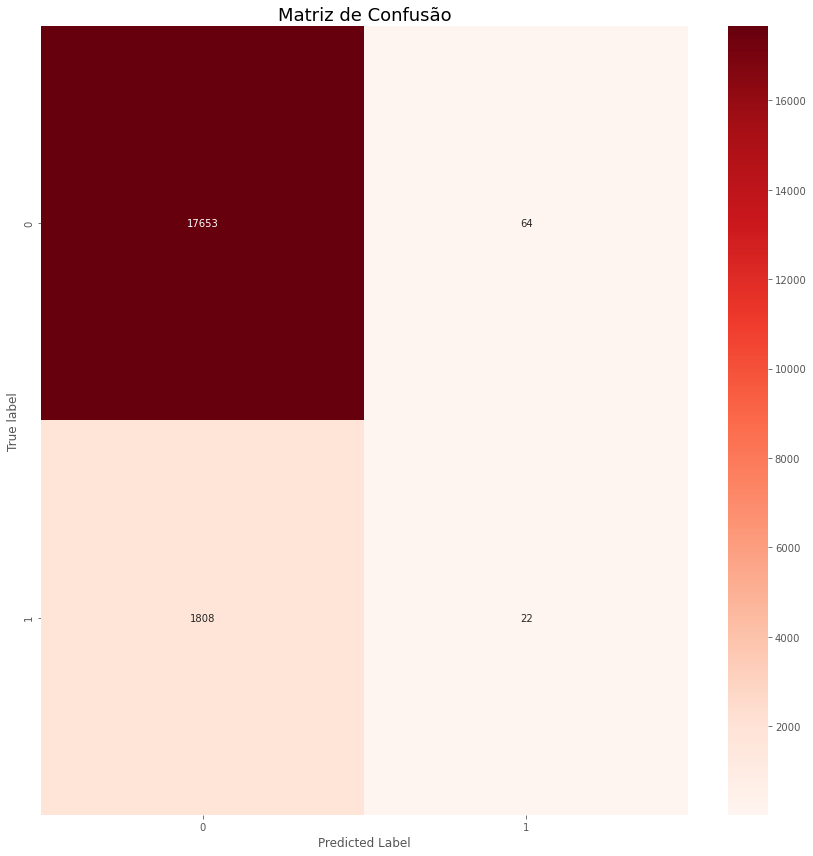

In [135]:
%%time
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_gbc
y_pred = cross_val_predict(model_gbc, X_train, y_train, cv = cv)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, ax=ax, fmt='d', cmap='Reds')

ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")

plt.tight_layout()


In [136]:
from sklearn.metrics import classification_report

# relatório do modelo
print('Relatório de classificação:\n', classification_report(y_train, y_pred, digits=4))

Relatório de classificação:
               precision    recall  f1-score   support

         0.0     0.9071    0.9964    0.9496     17717
         1.0     0.2558    0.0120    0.0230      1830

    accuracy                         0.9042     19547
   macro avg     0.5815    0.5042    0.4863     19547
weighted avg     0.8461    0.9042    0.8629     19547



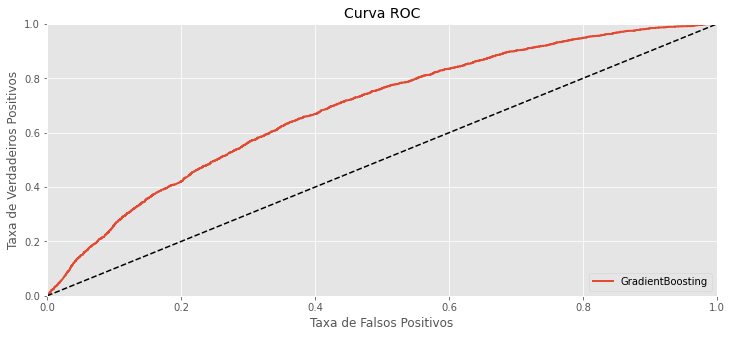

CPU times: user 340 ms, sys: 19.5 ms, total: 359 ms
Wall time: 365 ms


In [137]:
%%time
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

fig, ax = plt.subplots(figsize = (12,5))

plt.plot(fpr, tpr, linewidth=2, label = 'GradientBoosting')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC', fontsize = 14)

plt.show()

In [138]:
from sklearn.metrics import roc_auc_score
print('Área sob a curva ROC: {:.4f}'.format(roc_auc_score(y_train, y_scores)))

Área sob a curva ROC: 0.6877


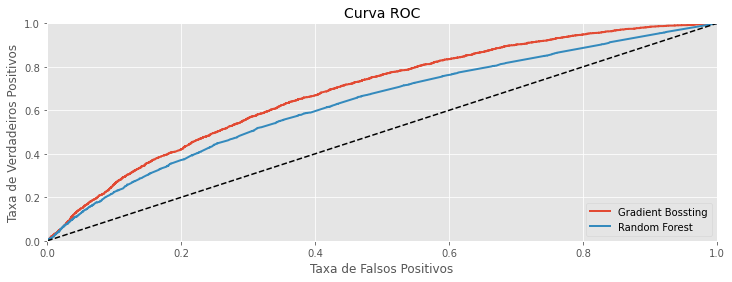

Área sob a curva ROC - Gradient Boosting: 0.6877
Área sob a curva ROC - Random Forest: 0.6324


In [139]:
np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_rf = RandomForestClassifier(n_estimators=100)
y_prob_forest = cross_val_predict(model_rf, X_train, y_train, cv = cv, method = 'predict_proba')

y_scores_forest = y_prob_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

fig, ax = plt.subplots(figsize = (12,4))

plt.plot(fpr, tpr, linewidth=2, label = 'Gradient Bossting')
plt.plot(fpr_forest, tpr_forest, linewidth=2, label = 'Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC', fontsize = 14)

plt.show()

print('Área sob a curva ROC - Gradient Boosting: {:.4f}'.format(roc_auc_score(y_train, y_scores)))
print('Área sob a curva ROC - Random Forest: {:.4f}'.format(roc_auc_score(y_train, y_scores_forest)))

In [140]:
#Lidando com classes desbalanceadas
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [141]:
nr = NearMiss()

X, y = nr.fit_resample(X, y)

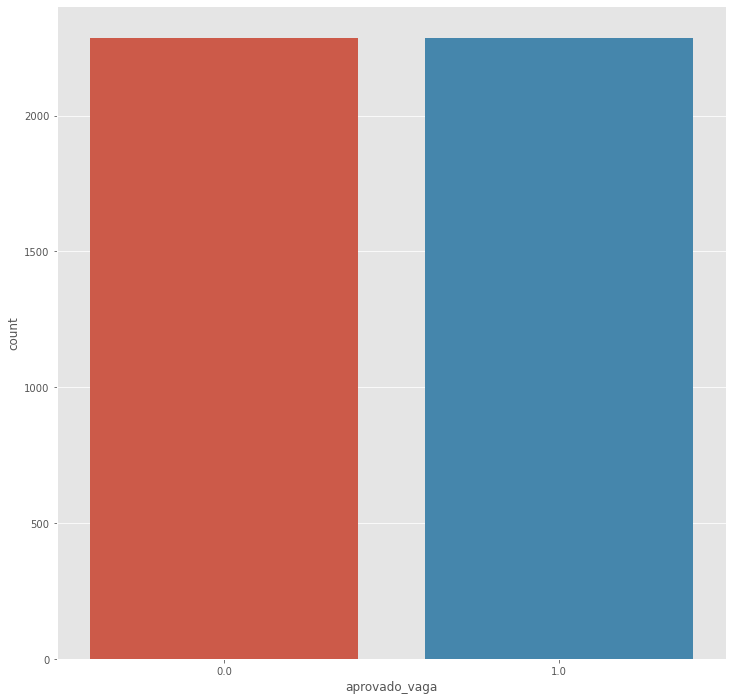

In [142]:
ax = sns.countplot(x=y)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y)

In [144]:
%%time
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model = DecisionTreeClassifier(max_depth=5)
model_svc = SVC()
model_log = LogisticRegression(solver='liblinear')
model_rand = RandomForestClassifier(n_estimators=100)
model_gbc = GradientBoostingClassifier(n_estimators=100, max_depth=5)
model_light = lgbm.LGBMClassifier()
model_xgboost = XGBClassifier()


models = [model, model_svc, model_log, model_rand, model_gbc, model_light, model_xgboost]
name = ['Árvore de Decisão', 'SVC', 'Regressão Logística', 'Random Forest', 'GradientBoosting', 'Lightgbm', 'XgBoosting']

count = 0
for item in models:
  np.random.seed(SEED)
  results = cross_val_score(item, X_train, y_train, cv = cv, scoring = 'accuracy')
  mean = results.mean()
  dv = results.std()
  print('Acurácia média - Modelo {}: {:.2f}%'.format(name[count], mean*100))
  print('Intervalo de acurácia - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'.format(name[count], (mean - 2*dv)*100, (mean + 2*dv)*100))
  count += 1  


Acurácia média - Modelo Árvore de Decisão: 83.85%
Intervalo de acurácia - Modelo Árvore de Decisão: [81.65% ~ 86.05%]

Acurácia média - Modelo SVC: 72.18%
Intervalo de acurácia - Modelo SVC: [70.36% ~ 74.00%]

Acurácia média - Modelo Regressão Logística: 77.48%
Intervalo de acurácia - Modelo Regressão Logística: [75.83% ~ 79.13%]

Acurácia média - Modelo Random Forest: 83.90%
Intervalo de acurácia - Modelo Random Forest: [81.98% ~ 85.83%]

Acurácia média - Modelo GradientBoosting: 83.71%
Intervalo de acurácia - Modelo GradientBoosting: [82.03% ~ 85.39%]

Acurácia média - Modelo Lightgbm: 83.25%
Intervalo de acurácia - Modelo Lightgbm: [81.57% ~ 84.93%]

[22:48:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[22:48:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[22:48:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[22:48:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[22:48:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Acurácia média - Modelo XgBoosting: 82.97%
Intervalo de acurácia - Modelo XgBoosting: [81.16% ~ 84.79%]

CPU times: user 34.5 s, sys: 272 ms, total: 34.8 s
Wall time: 25.4 s


In [145]:
%%time
def intervalo_prec(results):
  mean = results.mean()
  dv = results.std()
  print('Precisão média: {:.2f}%'.format(mean*100))
  print('Intervalo de Precisão: [{:.2f}% ~ {:.2f}%]'.format((mean - 2*dv)*100, (mean + 2*dv)*100))

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_rand
results = cross_val_score(model_gbc, X_train, y_train, cv = cv, scoring = 'precision')
intervalo_prec(results)

Precisão média: 90.64%
Intervalo de Precisão: [87.62% ~ 93.65%]
CPU times: user 10.9 s, sys: 8.03 ms, total: 10.9 s
Wall time: 10.9 s


In [146]:
%%time
def intervalo_recall(results):
  mean = results.mean()
  dv = results.std()
  print('Recall médio: {:.2f}%'.format(mean*100))
  print('Intervalo de Recall: [{:.2f}% ~ {:.2f}%]'.format((mean - 2*dv)*100, (mean + 2*dv)*100))

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_rand
results = cross_val_score(model_gbc, X_train, y_train, cv = cv, scoring = 'recall')
intervalo_recall(results)

Recall médio: 75.23%
Intervalo de Recall: [70.66% ~ 79.80%]
CPU times: user 11.3 s, sys: 3.92 ms, total: 11.3 s
Wall time: 11.3 s


### Trade off: Precisão ou recall

- OBS: Lembrando que na competição do Kaggle, os critérios de desempate são: F1-score e Recall. 

Com base nessa informação, o nosso trade off, sempre será visando aumentar o nosso recall. 

Porém o nosso F1 Score, é uma média harmônica entre precisão e recall. Ou seja, se eu aumentar muito o recall, a ponto de desbalancear muito as previsões, meu F1 Score irá cair muito. 

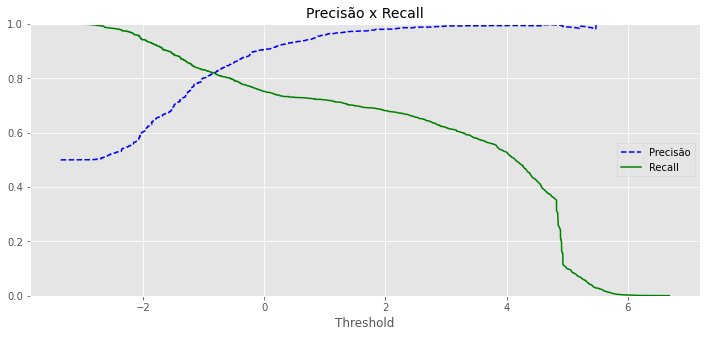

CPU times: user 11.5 s, sys: 23.8 ms, total: 11.6 s
Wall time: 11.6 s


In [147]:
%%time
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_gbc
y_scores = cross_val_predict(model_gbc, X_train, y_train, cv = cv, method = 'decision_function')

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

fig, ax = plt.subplots(figsize = (12,5))

plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precisão')
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
plt.xlabel('Threshold')
plt.legend(loc = 'center right')
plt.ylim([0,1])
plt.title('Precisão x Recall', fontsize = 14)

plt.show()


In [175]:
y_train_pred_recall_max = (y_scores > -0.2)

print('Nova precisão: {:.4f}'.format(precision_score(y_train,y_train_pred_recall_max)))
print('Novo recall: {:.4f}'.format(recall_score(y_train,y_train_pred_recall_max)))
print('Novo F1 Score: {:.4f}'.format(f1_score(y_train,y_train_pred_recall_max)))

Nova precisão: 0.8965
Novo recall: 0.7671
Novo F1 Score: 0.8268


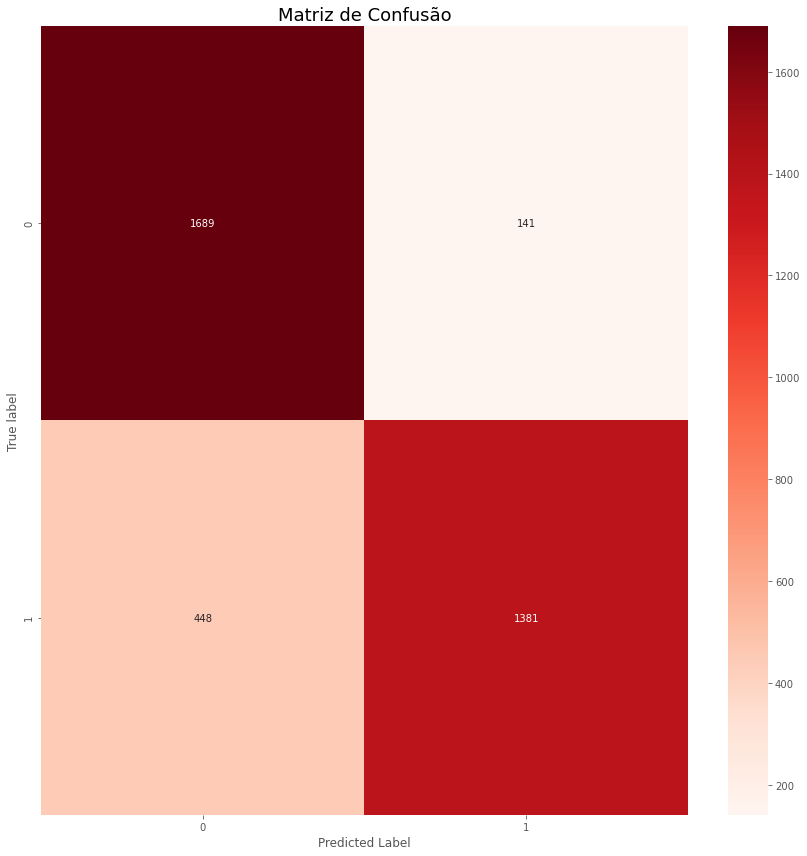

In [181]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_rand = RandomForestClassifier(n_estimators=100)
y_pred = cross_val_predict(model_rand, X_train, y_train, cv = cv)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, ax=ax, fmt='d', cmap='Reds')

ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")

plt.tight_layout()

In [182]:
from sklearn.metrics import classification_report

# relatório do modelo
print('Relatório de classificação:\n', classification_report(y_train, y_pred, digits=4))

Relatório de classificação:
               precision    recall  f1-score   support

         0.0     0.7904    0.9230    0.8515      1830
         1.0     0.9074    0.7551    0.8242      1829

    accuracy                         0.8390      3659
   macro avg     0.8489    0.8390    0.8379      3659
weighted avg     0.8488    0.8390    0.8379      3659



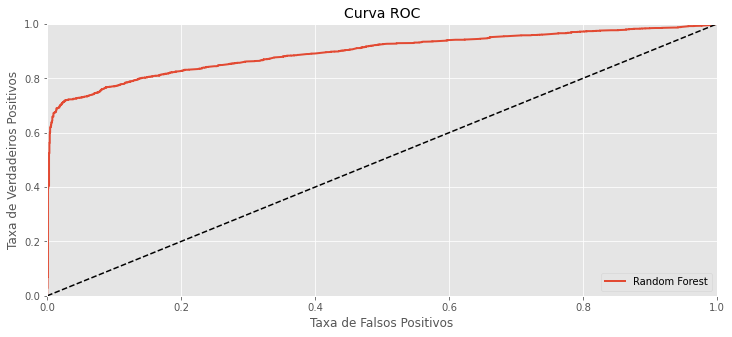

CPU times: user 287 ms, sys: 16 ms, total: 303 ms
Wall time: 302 ms


In [183]:
%%time
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

fig, ax = plt.subplots(figsize = (12,5))

plt.plot(fpr, tpr, linewidth=2, label = 'Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC', fontsize = 14)

plt.show()

In [184]:
from sklearn.metrics import roc_auc_score
print('Área sob a curva ROC: {:.4f}'.format(roc_auc_score(y_train, y_scores)))


Área sob a curva ROC: 0.8957


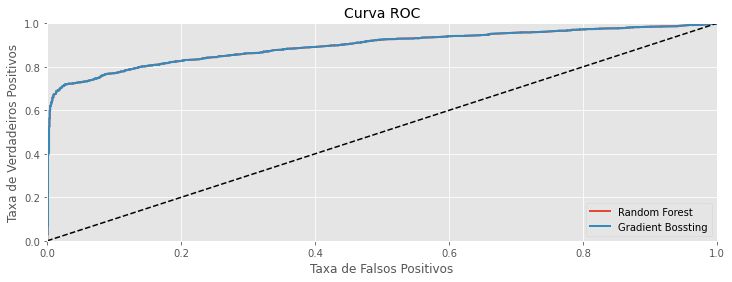

Área sob a curva ROC - Random Forest: 0.8957
Área sob a curva ROC - Gradient Boosting: 0.8957


In [185]:
np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_gbc = GradientBoostingClassifier(n_estimators=100, max_depth=5)
y_prob_forest = cross_val_predict(model_gbc, X_train, y_train, cv = cv, method = 'predict_proba')

y_scores_forest = y_prob_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

fig, ax = plt.subplots(figsize = (12,4))

plt.plot(fpr, tpr, linewidth=2, label = 'Random Forest')
plt.plot(fpr_forest, tpr_forest, linewidth=2, label = 'Gradient Bossting')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC', fontsize = 14)

plt.show()

print('Área sob a curva ROC - Random Forest: {:.4f}'.format(roc_auc_score(y_train, y_scores)))
print('Área sob a curva ROC - Gradient Boosting: {:.4f}'.format(roc_auc_score(y_train, y_scores_forest)))

In [186]:
np.random.seed(SEED)

modelfinal = RandomForestClassifier(n_estimators=100)
modelfinal.fit(X_train, y_train)

y_pred = modelfinal.predict(X_test)
y_prob = modelfinal.predict_proba(X_test)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
 
# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test,y_prob[:,1])))

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0     0.8129    0.9409    0.8722       457
         1.0     0.9301    0.7838    0.8507       458

    accuracy                         0.8623       915
   macro avg     0.8715    0.8624    0.8615       915
weighted avg     0.8715    0.8623    0.8614       915

AUC: 0.9092



## IMPORTAR O ARQUIVO DE SUBMISSÃO E FAZER AS PREVISÕES

In [206]:
del treino['ultimo_cargo_candidato']

treino.head(2)

,ultimo_salario_candidato,nivel_candidato,formacao_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga
1128,890.0,1.0,5,2.0,1.0,0.00,0.0,0.00,6.5,0.0
1125,0.0,5.0,6,4.0,0.0,8.32,0.0,7.32,8.4,0.0


In [207]:
## APLICANDO O MESMO NOS DADOS DE TREINO
# Normalizer - 
norm= Normalizer()

treino[['ultimo_salario_candidato', 'nivel_candidato', 'formacao_candidato', 'nivel_ingles_candidato', 'nivel_espanhol_candidato', 'mediana_teste_ingles_candidato', 'mediana_teste_espanhol_candidato', 'mediana_teste_logica_candidato', 'mediana_teste_outros_candidato', 'cargo_vaga']]= norm.fit_transform(treino[['ultimo_salario_candidato', 'nivel_candidato', 'formacao_candidato', 'nivel_ingles_candidato', 'nivel_espanhol_candidato', 'mediana_teste_ingles_candidato', 'mediana_teste_espanhol_candidato', 'mediana_teste_logica_candidato', 'mediana_teste_outros_candidato', 'cargo_vaga']])

scaler = StandardScaler()
treino[['ultimo_salario_candidato', 'nivel_candidato', 'formacao_candidato', 'nivel_ingles_candidato', 'nivel_espanhol_candidato', 'mediana_teste_ingles_candidato', 'mediana_teste_espanhol_candidato', 'mediana_teste_logica_candidato', 'mediana_teste_outros_candidato', 'cargo_vaga']]= scaler.fit_transform(treino[['ultimo_salario_candidato', 'nivel_candidato', 'formacao_candidato', 'nivel_ingles_candidato', 'nivel_espanhol_candidato', 'mediana_teste_ingles_candidato', 'mediana_teste_espanhol_candidato', 'mediana_teste_logica_candidato', 'mediana_teste_outros_candidato', 'cargo_vaga']])


In [208]:
treino

,ultimo_salario_candidato,nivel_candidato,formacao_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga
1128,0.790191,-0.492593,-0.696916,-0.452506,-0.316476,-0.458058,-0.182517,-0.468503,-0.521795,-0.301039
1125,-1.266055,1.244005,0.407282,1.952312,-0.336973,2.318139,-0.182517,1.908075,1.582542,-0.301039
1126,-1.266055,-0.080898,0.406763,1.708576,0.993823,2.243478,3.819071,1.603225,1.886391,-0.301039
1127,0.790269,-0.495212,-0.709059,-0.464949,-0.336973,-0.448914,-0.182517,-0.456936,-0.543260,-0.301039
1140,0.790272,-0.490435,-0.710340,-0.469937,-0.327851,-0.450857,-0.161946,-0.459160,-0.546046,-0.301039
...,...,...,...,...,...,...,...,...,...,...
47101,0.790107,-0.499033,-0.695795,-0.449345,-0.336973,-0.425235,-0.148137,-0.432003,-0.524636,-0.301039
47102,0.790264,-0.494049,-0.708836,-0.466250,-0.329041,-0.447622,-0.157077,-0.454599,-0.545047,-0.301039
47103,0.790282,-0.494447,-0.711723,-0.472266,-0.336973,-0.454949,-0.182517,-0.465193,-0.547857,-0.301039
47104,0.790271,-0.487569,-0.708035,-0.468275,-0.330892,-0.452572,-0.182517,-0.458715,-0.546882,-0.301039


In [216]:
sub = modelfinal.predict(treino)
submission = pd.DataFrame()
submission['aprovado_vaga'] = sub

submission.to_csv('submission_ultimo.csv')


In [221]:
db = pd.read_csv('submission_ultimo.csv')
db['aprovado_vaga'].value_counts()

1.0    25055
0.0     1079
Name: aprovado_vaga, dtype: int64

In [247]:
data.to_csv('arquivo_treino.csv')
treino.to_csv('arquivo_teste.csv')